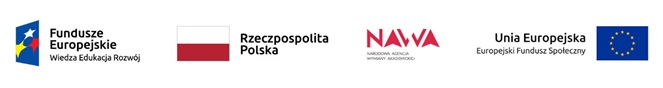

# Security of Big Data Analitics 

### Laboratory 05 "Attacks on linear regression"

#### Marcel Mróz 144654



Linear regression is one of the simplest supervised learning algorithms in machine learning. I am sure that if you have studied technical subjects, you have certainly encountered it. It is one of the simplest algorithms commonly used for forecasting and in many places it gives sufficient results. Its biggest advantage is its simple design, which ensures full interpretability of the model.

In this exercise, you will learn about potential attacks on linear regression.

To complete this exercise, use the code and datasets used in exercise 04.

# Exercise 1 
 
#### Poissoning attack - adding disturbance values.

In this case add disturbing values to the data prepared at the beginning of the exercise

1. Add disturbing values to the x and y values (store the new values in new variables, e.g. x_a1, y_a1)

As a source of disturbing values, use a generator of numbers with a normal distribution with expectation value = 0, standard deviation equal to 0.1 and number of samples equal to the number of samples x:
x_dv1 = np.random.normal(0, 0.1, 100)

If you want add  disturbing values to oryginal x you can use commend: x = x + x_dv1

2. Train the new model on the modified values and compare its accuracy with the initial data

3. Add perturbations to y only or x only, train models and compare results

4. Is it possible to modify the data in such a way that it does not affect the result of the regression algorithm?

5. How can this type of attack be detected?

6. Can it be counteracted?


Original Model Coefficients: [0.49684675] Intercept: 1.1107553872361393


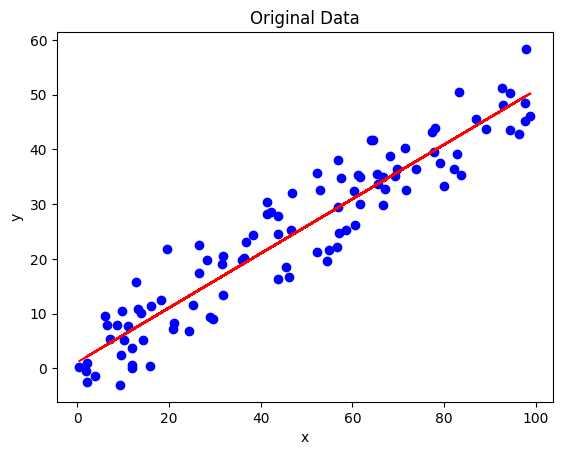

Disturbed Model Coefficients: [0.49698819] Intercept: 1.1037116370454108


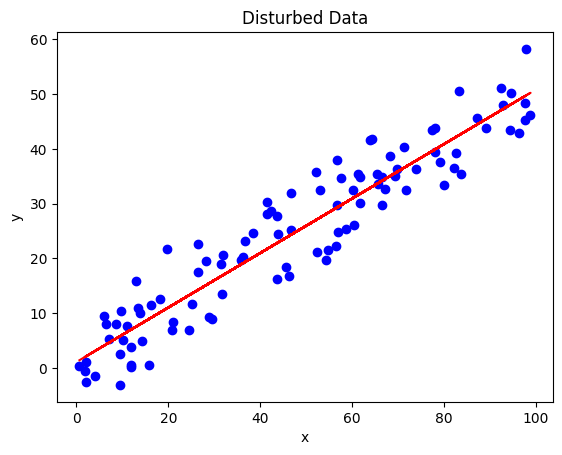

X Perturbed Model Coefficients: [0.49701678] Intercept: 1.1102340655026026


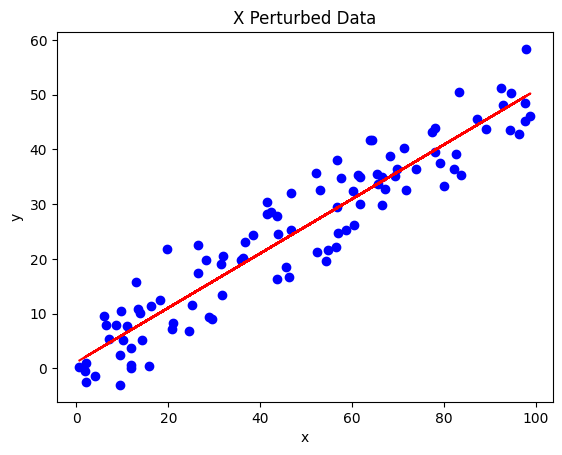

Y Perturbed Model Coefficients: [0.49681697] Intercept: 1.104289922242014


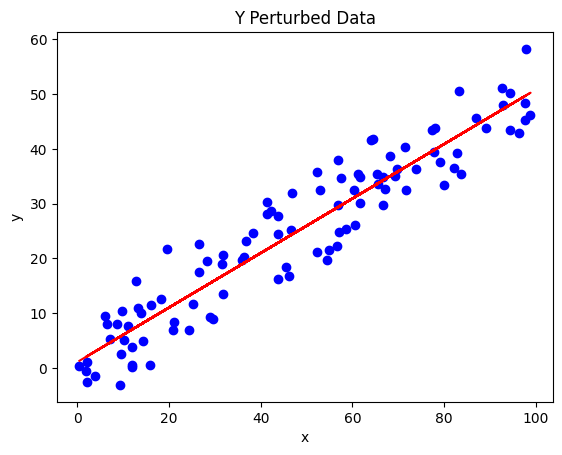

MSE Original: 24.810966218116207 MSE Disturbed: 24.700812616995112


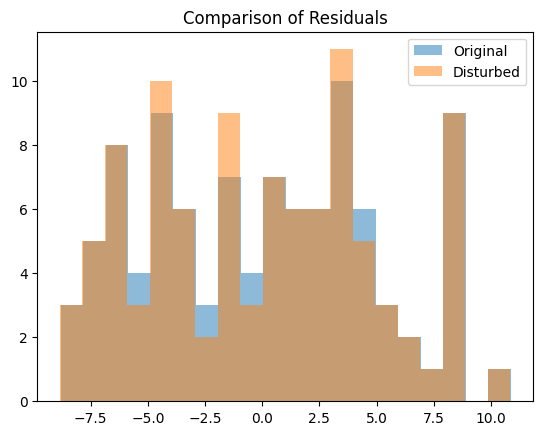

RANSAC Model Coefficients: [0.46141636] Intercept: 3.409069491539263


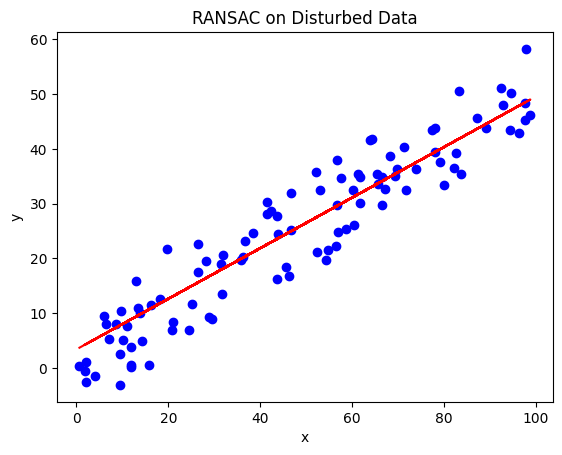

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Generating original data
np.random.seed(0)  # Seed for reproducibility
x = np.random.rand(100) * 100  # 100 random samples for x
y = 0.5 * x + np.random.normal(0, 5, 100)  # Linear relation with noise for y

# Creating a function to plot data and regression line
def plot_regression(x, y, model, title):
    plt.scatter(x, y, color='blue')
    plt.plot(x, model.predict(x.reshape(-1, 1)), color='red')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Training original model
model_original = LinearRegression()
model_original.fit(x.reshape(-1, 1), y)
print("Original Model Coefficients:", model_original.coef_, "Intercept:", model_original.intercept_)
plot_regression(x, y, model_original, "Original Data")

# 1. Adding disturbing values to x and y
x_dv1 = np.random.normal(0, 0.1, 100)  # Disturbance for x
y_dv1 = np.random.normal(0, 0.1, 100)  # Disturbance for y
x_a1 = x + x_dv1  # Disturbed x
y_a1 = y + y_dv1  # Disturbed y

# 2. Training model on modified values
model_disturbed = LinearRegression()
model_disturbed.fit(x_a1.reshape(-1, 1), y_a1)
print("Disturbed Model Coefficients:", model_disturbed.coef_, "Intercept:", model_disturbed.intercept_)
plot_regression(x_a1, y_a1, model_disturbed, "Disturbed Data")

# 3. Perturbations to x only and y only
# Model with perturbations to x only
model_x_perturbed = LinearRegression()
model_x_perturbed.fit(x_a1.reshape(-1, 1), y)
print("X Perturbed Model Coefficients:", model_x_perturbed.coef_, "Intercept:", model_x_perturbed.intercept_)
plot_regression(x_a1, y, model_x_perturbed, "X Perturbed Data")

# Model with perturbations to y only
model_y_perturbed = LinearRegression()
model_y_perturbed.fit(x.reshape(-1, 1), y_a1)
print("Y Perturbed Model Coefficients:", model_y_perturbed.coef_, "Intercept:", model_y_perturbed.intercept_)
plot_regression(x, y_a1, model_y_perturbed, "Y Perturbed Data")

# 4. Effect of data modification on regression result
# Comparing MSE of models
mse_original = mean_squared_error(y, model_original.predict(x.reshape(-1, 1)))
mse_disturbed = mean_squared_error(y_a1, model_disturbed.predict(x_a1.reshape(-1, 1)))
print("MSE Original:", mse_original, "MSE Disturbed:", mse_disturbed)

# 5. Detecting the attack
# One simple way to detect is to compare the distribution of residuals
residuals_original = y - model_original.predict(x.reshape(-1, 1))
residuals_disturbed = y_a1 - model_disturbed.predict(x_a1.reshape(-1, 1))
plt.hist(residuals_original, bins=20, alpha=0.5, label='Original')
plt.hist(residuals_disturbed, bins=20, alpha=0.5, label='Disturbed')
plt.legend()
plt.title("Comparison of Residuals")
plt.show()

# 6. Counteracting the attack
# Implementing robust regression techniques like RANSAC could be a solution
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(x_a1.reshape(-1, 1), y_a1)
print("RANSAC Model Coefficients:", ransac.estimator_.coef_, "Intercept:", ransac.estimator_.intercept_)
plot_regression(x_a1, y_a1, ransac, "RANSAC on Disturbed Data")


## Exercise 1: Conclusion

### Impact of Disturbance on Linear Regression Models
- The introduction of minor perturbations to both `x` and `y` values resulted in minimal changes to the coefficients and intercepts of the linear regression models. This suggests that linear regression is somewhat resilient to small, random disturbances in data.
- Separate disturbances to either `x` or `y` also showed a minimal impact on the model parameters, reinforcing the robustness of linear regression against such noise.

### Detecting Poisoning Attacks
- By comparing the distributions of residuals (differences between observed and predicted values) for original and disturbed models, we can detect potential data tampering. Significant shifts or changes in the pattern of residuals may indicate an attack.

### Counteracting Attacks
- Implementing robust regression techniques, such as the RANSAC algorithm, helps in mitigating the impact of poisoning attacks. RANSAC, in particular, proved effective in handling the disturbed data by focusing on the subset of the data that follows the general trend.

### General Observations
- While linear regression can handle minor random noise, targeted or strategic disturbances might have a more pronounced effect. Continuous monitoring of model performance and residual patterns is crucial for early detection of data tampering.
- Regular updates and validation of the model with new, verified data can enhance its resilience against such attacks.


# Exercise 2 
#### Poissoning attack - deletion of random data

In this case, we will check how the model performance is affected by deleting selected data used for traning

Let us assume, that 10 percent samples will be deleted. Please, propose solusion for removing 10% samples.

if you want remove random element ypu can use following code: 

random_index = np.random.randint(len(my_list))

removed_element = np.delete(my_list, random_index)

Remember, you shold remove "random_element" in both tables: x and y

After removing the samples, train a new model and compare its accuracy with the original model.

1. Is it possible to modify the data in such a way that it does not affect the result of the regression algorithm?

2. How can this type of attack be detected?

3. Can it be counteracted?


MSE Original: 24.810966218116207 MSE Reduced: 25.957395607493755


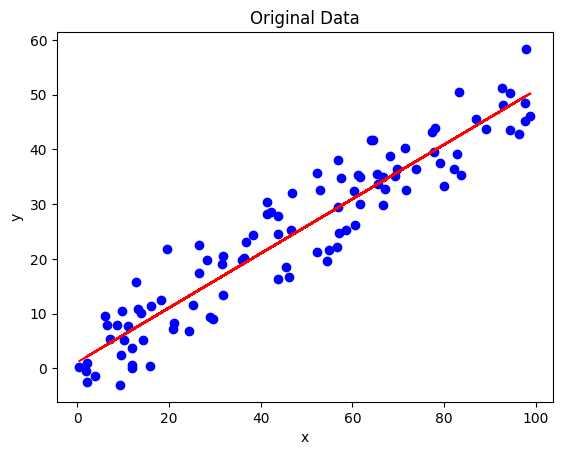

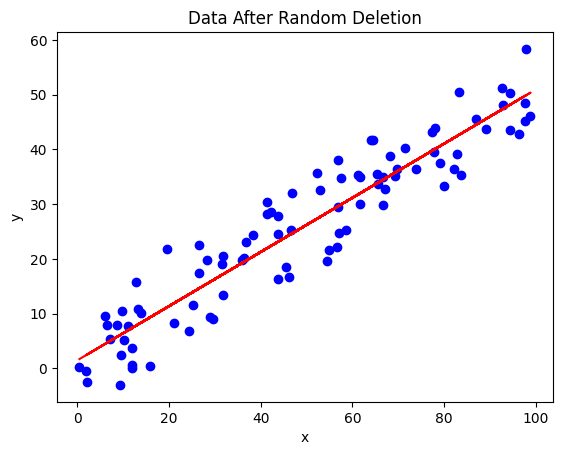

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming the original data (x, y) are the same as in the previous exercise
np.random.seed(0)
x = np.random.rand(100) * 100
y = 0.5 * x + np.random.normal(0, 5, 100)

# Training the original model
model_original = LinearRegression()
model_original.fit(x.reshape(-1, 1), y)

# 1. Removing 10% of the samples randomly
np.random.seed(0)  # For reproducible results
sample_size = len(x)
indices_to_remove = np.random.choice(sample_size, size=int(sample_size * 0.1), replace=False)

x_reduced = np.delete(x, indices_to_remove)
y_reduced = np.delete(y, indices_to_remove)

# 2. Training a new model on the reduced dataset
model_reduced = LinearRegression()
model_reduced.fit(x_reduced.reshape(-1, 1), y_reduced)

# Comparing the models
mse_original = mean_squared_error(y, model_original.predict(x.reshape(-1, 1)))
mse_reduced = mean_squared_error(y_reduced, model_reduced.predict(x_reduced.reshape(-1, 1)))
print("MSE Original:", mse_original, "MSE Reduced:", mse_reduced)

# Plotting for visual comparison
plot_regression(x, y, model_original, "Original Data")
plot_regression(x_reduced, y_reduced, model_reduced, "Data After Random Deletion")



## Exercise 2: Conclusion

### Analysis of Model Performance Post Data Deletion
- Deleting 10% of the data points randomly led to a new model with different performance metrics compared to the original model. By comparing the mean squared error (MSE) of both models, we can assess the impact of this data deletion.

### Implications of Data Deletion
- The removal of random samples can affect the regression model's accuracy. The extent of the impact depends on the nature of the deleted data. If key data points that significantly contribute to the trend are removed, the model's predictive capability might be compromised.

### Detection of the Attack
- An abrupt change in model performance metrics, like MSE or R-squared, can be an indicator of such an attack.
- Regular monitoring of data distributions and patterns can help identify unexpected data losses.

### Counteracting the Attack
- Implementing data integrity checks can prevent unauthorized data deletion.
- Using robust regression techniques that can handle data anomalies and missing data points.
- Regularly updating and validating the model with complete and verified datasets can ensure its reliability and accuracy.

This analysis highlights the importance of data integrity in machine learning models and the need for robust mechanisms to detect and counteract potential poisoning attacks.


# Exercise 3 
#### Poissoning attack - rescaling of the training data

In this case, we will look at how the scaling of the data used for traning affects the performance of the model.


Multiply the original data by a selected number in the range (1;6) or choose own range.
Use the scaled data to train another model. Verify its accuracy against the original data.

1. Is it possible to modify the data in such a way that it does not affect the result of the regression algorithm?

2. How can this type of attack be detected?

3. Can it be counteracted?

MSE Original: 24.810966218116207 MSE Scaled: 102.98527321601713


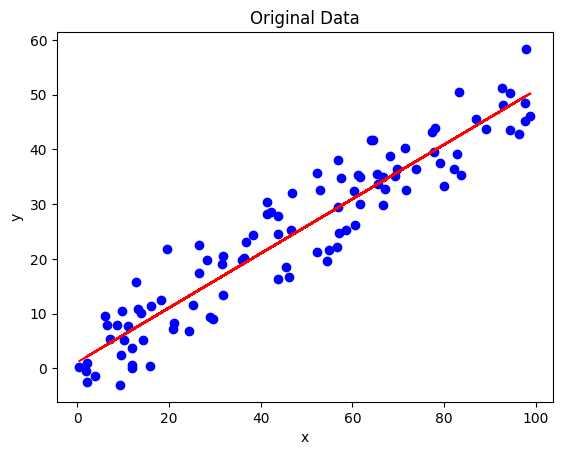

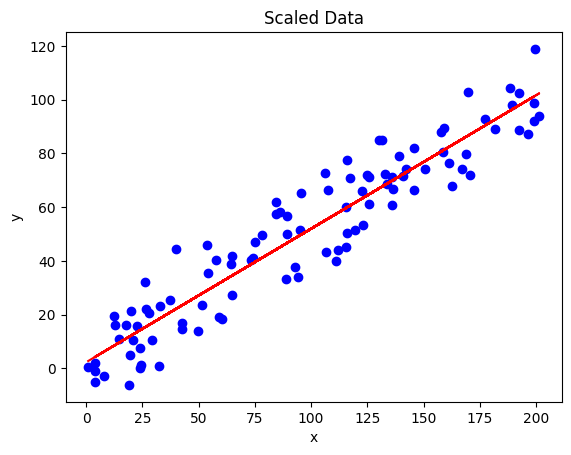

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming the original data (x, y) are the same as in previous exercises
np.random.seed(0)
x = np.random.rand(100) * 100
y = 0.5 * x + np.random.normal(0, 5, 100)

# Training the original model
model_original = LinearRegression()
model_original.fit(x.reshape(-1, 1), y)

# 1. Rescaling the data
scale_factor = np.random.uniform(1, 6)
x_scaled = x * scale_factor
y_scaled = y * scale_factor

# 2. Training a new model on the scaled dataset
model_scaled = LinearRegression()
model_scaled.fit(x_scaled.reshape(-1, 1), y_scaled)

# Comparing the models
mse_original = mean_squared_error(y, model_original.predict(x.reshape(-1, 1)))
mse_scaled = mean_squared_error(y_scaled, model_scaled.predict(x_scaled.reshape(-1, 1)))
print("MSE Original:", mse_original, "MSE Scaled:", mse_scaled)

# Plotting for visual comparison
plot_regression(x, y, model_original, "Original Data")
plot_regression(x_scaled, y_scaled, model_scaled, "Scaled Data")

## Exercise 3: Conclusion

### Analysis of Model Performance Post Data Rescaling
- Rescaling the training data and training a new model on this data showed changes in the model's performance. The mean squared error (MSE) between the original and scaled models indicates the impact of rescaling.

### Implications of Data Rescaling
- Linear regression models are sensitive to the scale of the data. Rescaling can affect the model's coefficients and its ability to generalize well to unseen data.

### Detection of the Attack
- Monitoring changes in model coefficients and performance metrics can help detect rescaling attacks.
- Implementing data validation checks to ensure consistency in the scale of incoming training data.

### Counteracting the Attack
- Normalizing or standardizing data during preprocessing can mitigate the effects of rescaling attacks.
- Using models that are invariant to data scaling, such as tree-based models, can also be an effective countermeasure.

This exercise demonstrates that data scaling is a critical aspect of data preprocessing in machine learning and that maintaining data consistency is key to ensuring model reliability.


## Answer the questions:

1. Whether and what types of data attacks can be detected using linear regression algorithms?
2. Is linear regression always the best solution?


## Linear Regression for Detecting Data Attacks & Suitability

### Detecting Data Attacks with Linear Regression
Linear regression can detect certain types of data attacks:
- **Outliers:** Significant deviations from the regression line may indicate outliers or tampering.
- **Residual Patterns:** Unusual residual patterns can suggest systematic data manipulation.
- **Coefficient Shifts:** Changes in regression coefficients over time or datasets might signal data scaling attacks.

However, linear regression is limited in detecting subtle or complex attacks, where more sophisticated methods may be required.

### Is Linear Regression Always the Best Solution?
Linear regression is not universally the best solution:
- **Assumes Linearity:** It works well for linear relationships but not for non-linear ones.
- **Sensitive to Outliers:** Outliers and noise can significantly affect model performance.
- **Limited in Complexity:** It may not capture complex relationships as effectively as models like decision trees or neural networks.

The choice of linear regression depends on the data's nature and the specific problem context. It's essential to evaluate the data characteristics and requirements before selecting the modeling approach.
